### Ecommerce Users Rate of Spending Prediction

In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('datasets/ecommerce_customers.csv')

## EDA

In [13]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avg. Session Length   500 non-null    float64
 3   Time on App           500 non-null    float64
 4   Time on Website       500 non-null    float64
 5   Length of Membership  500 non-null    float64
 6   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(2)
memory usage: 27.5+ KB


Delete useless column from dataframe

In [ ]:
# df = df.drop('Avatar', axis=1)
df.info()

Doing some visualization

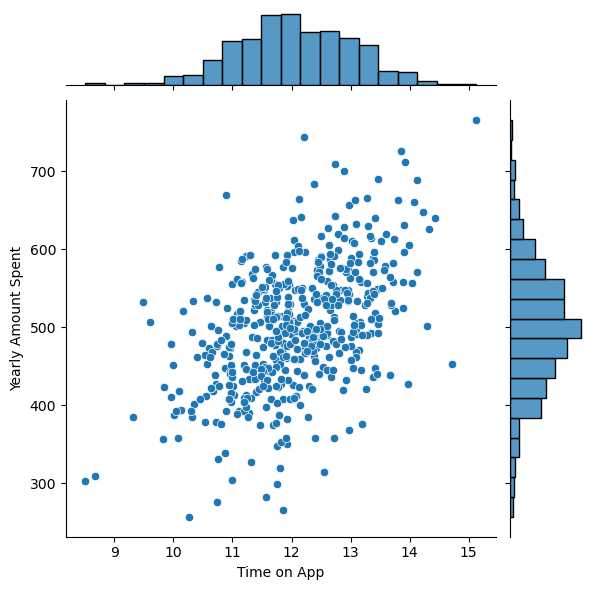

In [20]:
sns.jointplot(data=df, x="Time on App",y="Yearly Amount Spent", kind='scatter')

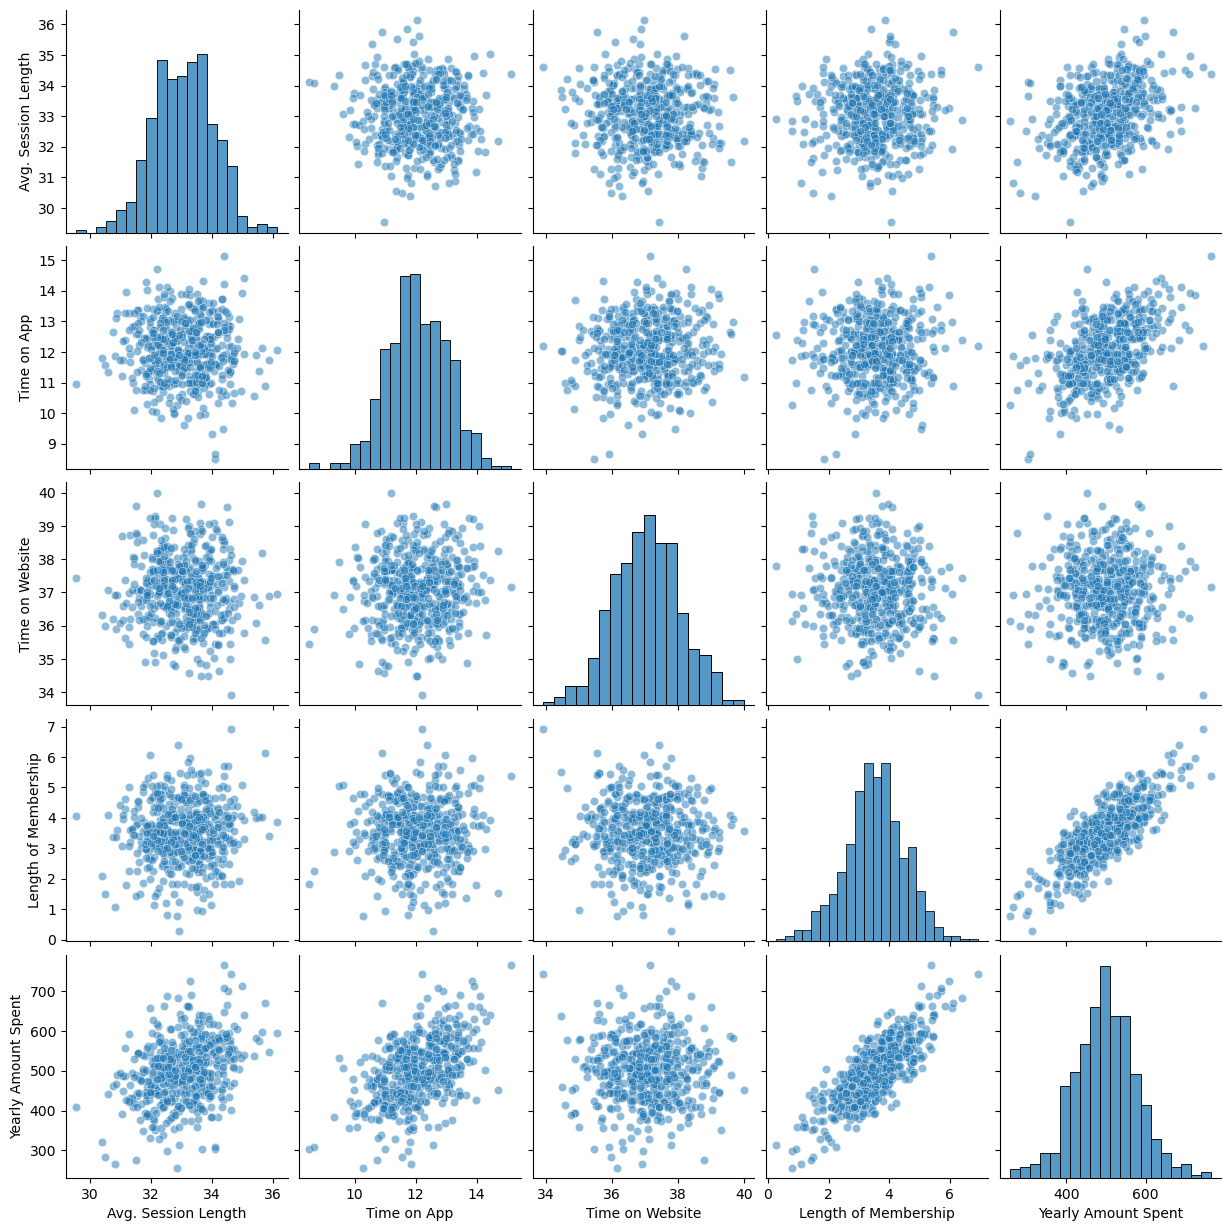

In [21]:
sns.pairplot(data=df, plot_kws={'alpha':0.5})

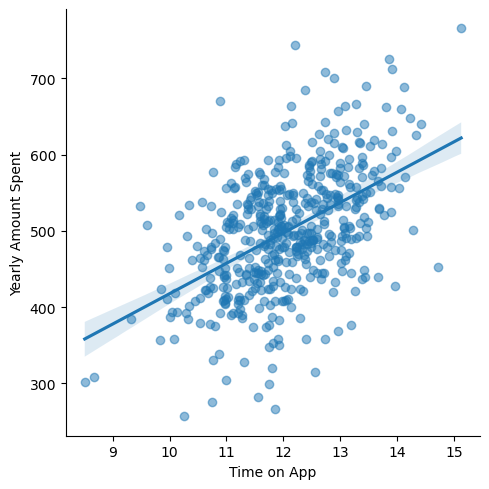

In [23]:
sns.lmplot(data=df, x="Time on App",y="Yearly Amount Spent", scatter_kws={'alpha':0.5})

In [28]:
X = df[['Avg. Session Length','Time on App', 'Time on Website' , 'Length of Membership']]
Y = df['Yearly Amount Spent']

X_train , X_test , y_train , y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Training the model

In [31]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [36]:
coef_df = pd.DataFrame(model.coef_,X.columns, columns=['coef'])
coef_df

,coef
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732


In [ ]:
predictions = model.predict(X_test)


2

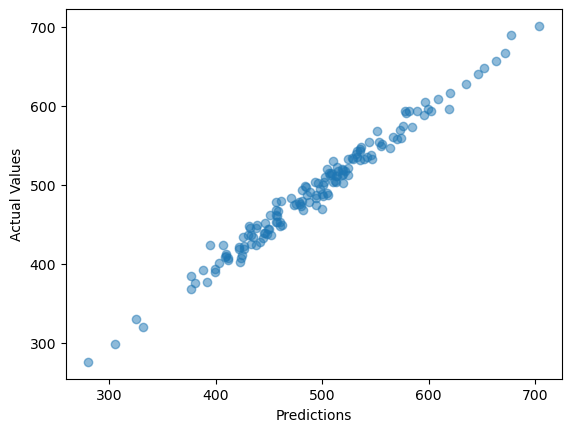

In [ ]:
plt.scatter(predictions, y_test,alpha=0.5)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.show()

In [57]:
print(f"Mean Squared Error is : {mean_squared_error(y_test, predictions)}")
print(f"Mean Absolute Error is : {mean_absolute_error(y_test, predictions)}")
print(f"R2 Error is : {r2_score(y_test, predictions) * 100:.2f}%")

Mean Squared Error is : 103.91554136503248
Mean Absolute Error is : 8.426091641432043
R2 Error is : 98.09%
